<a href="https://colab.research.google.com/github/Shezan57/DL-Journey/blob/main/dog-vs-cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dog-vs-cats

403 - Forbidden - Permission 'datasets.get' was denied


In [ ]:
!kaggle competitions download -c dogs-vs-cats

403 - Forbidden - You must accept this competition's rules before you'll be able to download files.


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

100%|██████████| 1.06G/1.06G [00:10<00:00, 106MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1


In [63]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from keras.regularizers import l2

In [64]:
#generators

train_ds = keras.utils.image_dataset_from_directory(
    directory=path+'/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.


In [65]:
val_ds = keras.utils.image_dataset_from_directory(
    directory=path+'/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

Found 5000 files belonging to 2 classes.


In [66]:
# Normalize
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image, label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)


In [67]:
# create CNN model

model = Sequential()

model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3),kernel_regularizer=l2(0.001))) #kernel_regularizer=l2(0.01)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(28,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(48,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(72,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_regularizer=l2(0.01)))  #kernel_regularizer=l2(0.01)
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [68]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 254, 254, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 125, 125, 28)        │           4,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 125, 125, 28)        │             112 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 62, 62, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 60, 60, 48)          │          12,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 60, 60, 48)          │             192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 30, 30, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 28, 28, 72)          │          31,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 28, 28, 72)          │             288 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 14, 14, 72)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 14112)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │       1,806,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,865,317 (7.12 MB)

 Trainable params: 1,864,989 (7.11 MB)

 Non-trainable params: 328 (1.28 KB)

In [69]:
#early stopping

from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_accuracy',patience=3)

In [70]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [71]:
history = model.fit(train_ds,epochs=25,validation_data=val_ds,callbacks=[callback])

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 66ms/step - accuracy: 0.6087 - loss: 1.9475 - val_accuracy: 0.6646 - val_loss: 0.8051
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 70ms/step - accuracy: 0.7395 - loss: 0.7369 - val_accuracy: 0.7574 - val_loss: 0.7011
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 63ms/step - accuracy: 0.7856 - loss: 0.7015 - val_accuracy: 0.7708 - val_loss: 0.8910
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 68ms/step - accuracy: 0.8217 - loss: 0.7372 - val_accuracy: 0.7964 - val_loss: 0.8297
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 63ms/step - accuracy: 0.8533 - loss: 0.7368 - val_accuracy: 0.8560 - val_loss: 0.7784
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.8757 - loss: 0.7036 - val_accuracy: 0.6672 - val_loss: 0.9912
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.8946 - loss: 0.6710 - val_accuracy: 0.8880 - val_loss: 0.6637
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 68ms/step - accuracy: 0.9024 - loss: 0.6291 - 

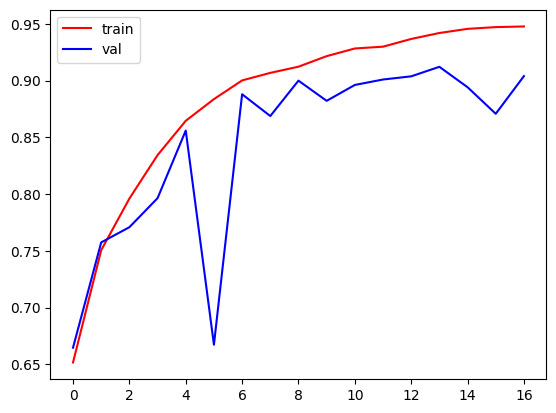

In [72]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='val')
plt.legend()
plt.show()

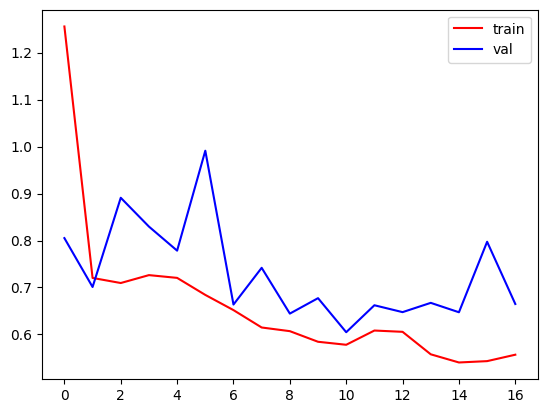

In [73]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='val')
plt.legend()
plt.show()

In [74]:
import cv2

In [75]:
test_img = cv2.imread('/content/dog3.jpg')

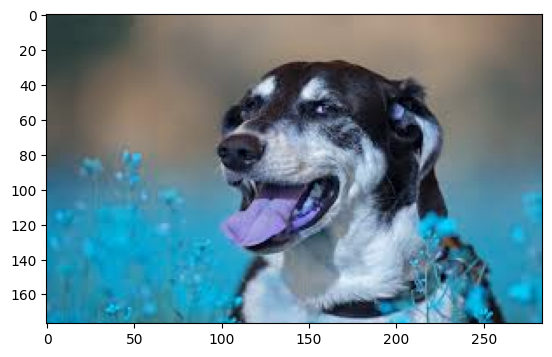

In [76]:
plt.imshow(test_img)

In [77]:
test_img.shape

(177, 284, 3)

In [78]:
test_img = cv2.resize(test_img,(256,256))

In [79]:
input_img = test_img.reshape((1,256,256,3))

In [80]:
model.predict(input_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step


array([[1.]], dtype=float32)

In [81]:
def predict_img(img):
  img = cv2.imread(img)
  img = cv2.resize(img,(256,256))
  input_img = img.reshape((1,256,256,3))
  prediction = model.predict(input_img)
  if prediction == 0:
    return 'Cat'
  else:
    return 'Dog'

In [82]:
predict_img('/content/dog1.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'Dog'